## Problem 4

In [1]:
# Importing Libraries
from __future__ import division
import numpy as np
from matplotlib.pyplot import imshow,show


#### Creating the Dataset

In [2]:
# Decimal codes for shades of  red, green, blue, with some yellow, teal and pink(RGB Colors)
color_codes=np.array([[220,20,60],[255,0,0],[255,99,71],[255,127,80],[205,92,92],[240,128,128],[233,150,122],[250,128,114],[240,230,140],
             [255,255,0],[107,142,35],[124,252,0],[127,255,0],[173,255,47],[0,100,0],[0,128,0],[0,0,139],[0,0,255],
             [100,149,237],[0,191,255],[30,144,255],[173,216,230],[0,128,128],[0,255,255]])


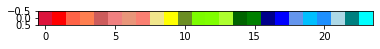

In [3]:
# Input Colors
colors = color_codes.reshape(1,24,3)
imshow(colors)
show()

#### Initializing Parameters

In [4]:
# Learning Rate Constant
lr = 0.8

# Total Number of Epochs
T=1000

# Neighbourhood sigma values. To change the value of sigma, please add, change values in this array
sigma_arr =[1, 10, 30, 50, 70]

# Number of Iterations(epochs) in cosideration. 
# To view results at different epochs, please add, change values in this array
epoch_arr = [20, 40, 100, 1000]


# Shape of Dataset
rows = color_codes.shape[0]
columns = color_codes.shape[1]

# Defining initial grid of 100*100 neurons with random weights
np.random.seed(42)
network = np.random.random((100, 100, 3))
    
# Normalize Entire Dataset
data = color_codes / color_codes.max()
print(data)

[[0.8627451  0.07843137 0.23529412]
 [1.         0.         0.        ]
 [1.         0.38823529 0.27843137]
 [1.         0.49803922 0.31372549]
 [0.80392157 0.36078431 0.36078431]
 [0.94117647 0.50196078 0.50196078]
 [0.91372549 0.58823529 0.47843137]
 [0.98039216 0.50196078 0.44705882]
 [0.94117647 0.90196078 0.54901961]
 [1.         1.         0.        ]
 [0.41960784 0.55686275 0.1372549 ]
 [0.48627451 0.98823529 0.        ]
 [0.49803922 1.         0.        ]
 [0.67843137 1.         0.18431373]
 [0.         0.39215686 0.        ]
 [0.         0.50196078 0.        ]
 [0.         0.         0.54509804]
 [0.         0.         1.        ]
 [0.39215686 0.58431373 0.92941176]
 [0.         0.74901961 1.        ]
 [0.11764706 0.56470588 1.        ]
 [0.67843137 0.84705882 0.90196078]
 [0.         0.50196078 0.50196078]
 [0.         1.         1.        ]]


#### Visual Representation of Initial Network with Random Weights

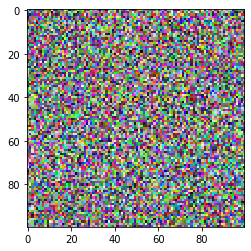

In [5]:
imshow(network)
show()

From the above image, we can see that the weights have been initialized randomly as a result of which no colors are converging.

#### Function to find winning neuron

The below function will be used to find a neuron in the grid which has the weight vector closest to the input weight vector.

In [6]:
def win_neuron(color, network_copy):
    
    # The below variable is used to store the position of winning neuron
    neuron_idx = np.array([0, 0])
    
    # Set the initial minimum distance to a huge number
    min_dist = np.iinfo(np.int).max
    
    # Calculate the Eucledian distance between each neuron vector and the input vector
    for x in range(network_copy.shape[0]):
        for y in range(network_copy.shape[1]):
            w = network_copy[x, y]
            
            # Since the distance is only used for comparison, the distance has been taken in square, 
            # to avoid expensive square root operation
            sq_dist = np.sum((w - color) ** 2)
            sq_dist = np.sqrt(sq_dist)
            
            # Comparison operation
            if sq_dist < min_dist:
                min_dist = sq_dist
                neuron_idx = np.array([x, y]) # winning neuron's location
                
    # Get vector corresponding to neuron_idx
    neuron = network_copy[neuron_idx[0], neuron_idx[1]]
    #bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)

    # Returning the winning neuron and its location
    return (neuron, neuron_idx)

#### Defining Decay Functions

In [7]:
# Function to get the change in the Sigma
def decay_sigma(sigma, k, epochs):
    return sigma * np.exp(-k / epochs)

# Function to get the change in learning rate
def decay_learning_rate(lr, k, epochs):
    return lr * np.exp(-k / epochs)

#### Defining the Neighbour Function
This function will calculate the influence on the neighbour of the winning neuron

In [8]:
def neighbor_func(distance, sigma):
    return np.exp(-distance / (2* (sigma**2)))

#### Implementation
The below steps have been taken :
1. Creating a copy of the original grid(100*100) network which will be updated for each value of sigma(𝜎).
2. Looping over the set of sigma under observation
3. Replicating the data of the original network to copy network.
4. While looping over the given number of epochs, the values of learning rate and sigma are updated in the start of each epoch and the 24 input vectors are fed to the network for each epoch.
5. The winning neuron and its location is found, and the neighbouring neuron vectors are updated accordingly.
6. Whenever, the current number of epochs is among(20,40,100,1000) the current state of the network is stored.

In [9]:
# Step 1:
network_copy=np.empty((100,100,3))

# Array in which all the required results will be stored
results = []

# Step 2 :
for rad in sigma_arr:  
    
    # Step 3:
    network_copy[:]=network[:]
    
    # Step 4:
    for k in range(T):
        r = decay_sigma(rad, k, T)
        l = decay_learning_rate(lr, k, T)
        
        # Step 5:
        for row in data:
            # Get the winning neuron and its location 
            neuron, neuron_idx = win_neuron(row, network_copy)
            
            # Finding the neighbours of the winning neurons within the current raduis and 
            # updating their weight vector to bring them close to the input
            for x in range(network_copy.shape[0]):
                for y in range(network_copy.shape[1]):
                    w = network_copy[x, y]
                    dist = np.sum((np.array([x, y]) - neuron_idx) ** 2)
                    dist_sq = np.sqrt(dist)
                    influence = neighbor_func(dist, r)
                    new_w = w + (l * influence * (row - w))
                    network_copy[x, y]= new_w
        
        # Step 6:  
        for e in range(len(epoch_arr)):
            if (k == epoch_arr[e]-1):
                results.append(np.array(network_copy))

#### Splitting the results for different values of Sigma

In [10]:
# The "result_splitted" array will have 1 entry for each value of sigma 
# Each entry in this "result_splitted" array is an array consisting of outputs(results at different number of epochs)
# for that value of sigma

results_splitted =[]
for i in range(len(sigma_arr)):
    start=len(epoch_arr)*i
    end=len(epoch_arr)*(i+1)
    results_splitted.append(np.array(results[start:end]))

Sigma<𝜎> : 1
Network after 20 epochs for value of sigma equal to 1


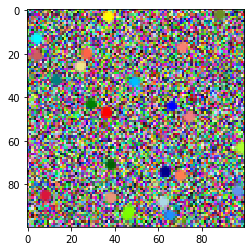

Network after 40 epochs for value of sigma equal to 1


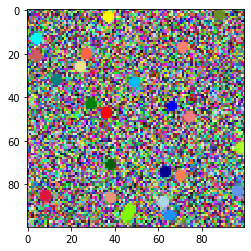

Network after 100 epochs for value of sigma equal to 1


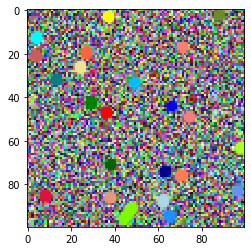

Network after 1000 epochs for value of sigma equal to 1


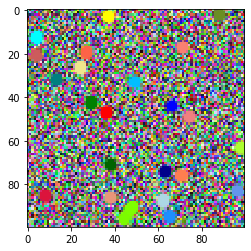

Sigma<𝜎> : 10
Network after 20 epochs for value of sigma equal to 10


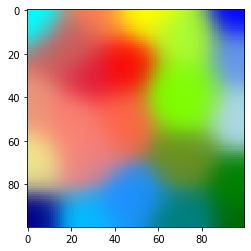

Network after 40 epochs for value of sigma equal to 10


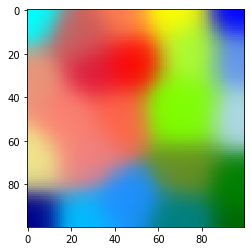

Network after 100 epochs for value of sigma equal to 10


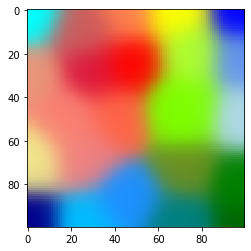

Network after 1000 epochs for value of sigma equal to 10


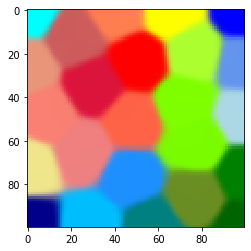

Sigma<𝜎> : 30
Network after 20 epochs for value of sigma equal to 30


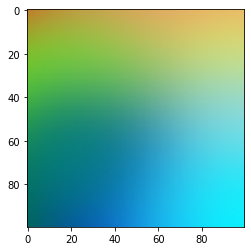

Network after 40 epochs for value of sigma equal to 30


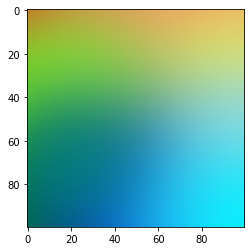

Network after 100 epochs for value of sigma equal to 30


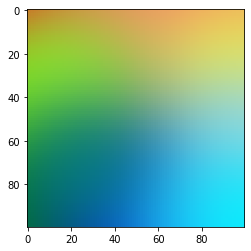

Network after 1000 epochs for value of sigma equal to 30


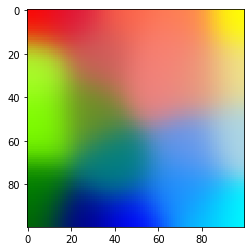

Sigma<𝜎> : 50
Network after 20 epochs for value of sigma equal to 50


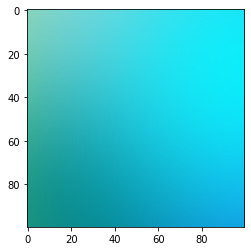

Network after 40 epochs for value of sigma equal to 50


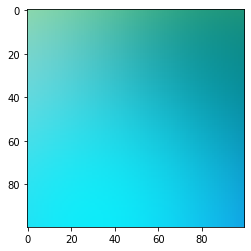

Network after 100 epochs for value of sigma equal to 50


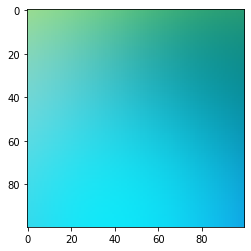

Network after 1000 epochs for value of sigma equal to 50


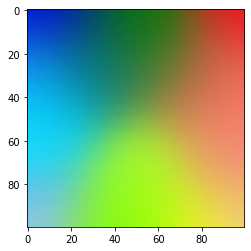

Sigma<𝜎> : 70
Network after 20 epochs for value of sigma equal to 70


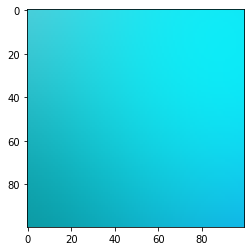

Network after 40 epochs for value of sigma equal to 70


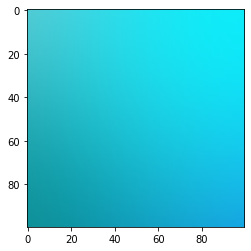

Network after 100 epochs for value of sigma equal to 70


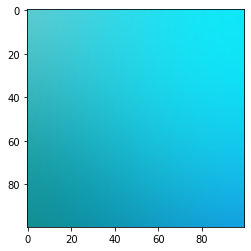

Network after 1000 epochs for value of sigma equal to 70


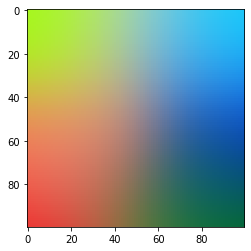

In [11]:
# Printing the outputs

for i in range(len(sigma_arr)):
    print('\033[1m'+'Sigma<𝜎> :'+ '\033[0m', sigma_arr[i])
    for j in range(len(results_splitted[i])):
        print('Network after', epoch_arr[j],'epochs for value of sigma equal to', sigma_arr[i])
        imshow(results_splitted[i][j])
        show()

#### Conclusions

The above plots have been plotted for different values of Sigma which are 1, 10, 30, 50 and 70 at the following interations 20th , 40th 100th and 1000th. Per analysis we can note that:

##### Case 1 : Sigma = 1
Since the value of sigma is too less, the neighbourhood size of the winning neuron is very small. Weights of only those neurons are updated, which are in very close proximity to the winning neuron that is why we see no major changes and only small colored dots here and there. Every input color has formed a very small colored patch and no convergence is there.
And, since the initial value of sigma is so small, which is further decayed with every iteration, the output or the result color map does not show much changes even after 1000 epochs. 

##### Case 2 : Sigma = 10
When sigma value is equal to 10, we can see that the colors have started to converge. identical color shades have come closer to each other. If we look at the color map after 20 epochs, the similar colors have started to merge thus forming clusters of identical inputs. As the number of iterations increase to 1000 we can see that most of the similar colors are grouped together and each color is distinguishable separately. If we look closely there are about 24 hexagon like shapes color boxes which is same as the number of inputs colors. 
Thus, one can say that when sigma was equal to 1, the inputs colors were distinguishable but they only existed in small patches without much affect on the network whereas when the value of sigma changed to 10, the 24 colors mapped the entire network, with similar colors clustered together and remained distinguishable.

##### Case 3 : Sigma = 30
Now, as the value of sigma is increased to 30, we note that the colors have started to coverge a lot more than before. Similar colors have merged and thus forming a cluster of identical inputs. As the number of iterations reach 20, 40 and then 100, there is not much difference in the map where the cluster formed by shades of blue is covering most of the map but as we reach the 1000th iteration, all the other shades have occupied some place on the map giving us a very good color map of shades of red, green blue with some yellow, teal and pink. identical shades have merged to quite an extent.

##### Case 4 : Sigma = 50
Increasing the value of sigma to 50 gives different results than all the 3 cases above. For interations from 20 till 100 we see that the entire map surface has been occupied by a blue colored cluster. Now this cluster is a perfectly converged cluster of shades of blue. As the iterations reach 1000, what we see is a perfect example of a Self Oraganizing Color Map where all the identical shades have been merged together perfectly and all the identical clusters are placed right next to each other. The 3 dimensional input data has been mapped to a 2 dimensional space forming clusters of identical inputs and giving us an idea of the relation between inputs.

##### Case 5 : Sigma = 70
Further, increasing the value of sigma to 70 produces somewhat similar results as sigma = 50. For the first 100 iterations, the map has been covered with the cluster of shades of blue but as we reach interation number 1000, the other colors shades have also appeared. The final result is somewhat similar to the case above wth even more convergence. In this case, shades to different colors are also converging thus it is difficult to distinguish color shades.

#### The best results have been obtained for sigma = 50 for 1000 epochs


####  References

http://blog.yhat.com/posts/self-organizing-maps-2.html